In [190]:
from sklearn import datasets, model_selection, linear_model, neural_network, preprocessing, model_selection

import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob, os


In [201]:
# First we load the data
#print((mnist.images[0]))
#mnist = datasets.load_digits()
#X,y = mnist.images,mnist.target
#X = X.reshape(len(X),-1)

images=[]#np.zeros(2628)
X=[]#np.zeros(2628)
y=[]
numTiles=12


for i,file in enumerate(glob.glob("tiles/*.jpg")):
    split=file.split("_")
    #print(i)
    #z = cv2.imread(file, cv2.IMREAD_GRAYSCALE),file.split("_")[1]
    #images.append(z) #file, tile number, rotation
    images.append(cv2.imread(file, cv2.IMREAD_GRAYSCALE)) #file, tile number, rotation
    #y.append(file.split("_")[1])
    #print(file.split("_")[-1].split(".")[0])
    if(split[-2]=='DEC' and int(split[-1].split(".")[0])<5):
        y.append(int(split[1]))
    elif(split[-2]=='DEC' and int(split[-1].split(".")[0])>=5):
        y.append(int(split[1])+1)
    elif(split[-2]=='RA' and int(split[-1].split(".")[0])<5):
        y.append(int(split[1]))
    elif(split[-2]=='RA' and int(split[-1].split(".")[0])>=5):
        y.append(int(split[1])+numTiles)
    else:
        y.append(int(split[1]))
        

#print(images[1][0][0])
#print(images[0])

#X = images[0][:]
#y= images[1][:]

X = np.asarray(images).reshape(len(images),-1)
#X=np.reshape(X,(2628,1))
print(X[0])
#for i in X:
#    print(np.shape(i))

#plt.imshow(X[0])



[0 0 0 ... 0 0 0]


This tile is 21


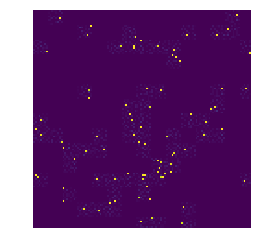

This tile is 0


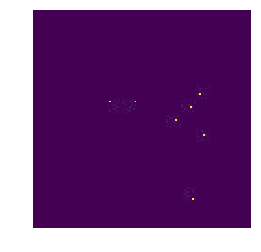

This tile is 77


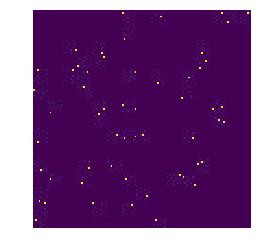

This tile is 99


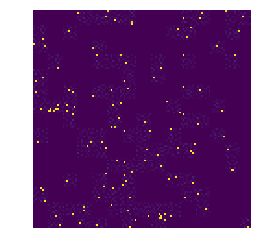

This tile is 11


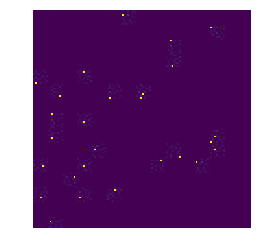

In [202]:
# Let's see what the data looks like
for idx in range(5):
    #print(idx)
    print("This tile is "+repr(y[idx]))
    plt.imshow(images[idx])
    plt.axis('off')
    plt.show()

In [203]:
scalar = preprocessing.MinMaxScaler()
scalar.fit(X)
X_normalized=scalar.transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalized,y, test_size=0.33, random_state=42)


In [204]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42).fit(X_train, y_train)

predictions = clf.predict(X_test)

perc=0

for i in range(len(predictions)):
    print(predictions[i], y_test[i])
    if y_test[i]==predictions[i]:
        perc+=1

print("Test scored: "+repr(perc/float(len(predictions))))



(118, 64)
(108, 130)
(71, 131)
(14, 123)
(71, 37)
(28, 78)
(66, 52)
(83, 13)
(71, 35)
(67, 75)
(77, 19)
(96, 121)
(50, 39)
(83, 26)
(18, 91)
(30, 32)
(71, 83)
(12, 109)
(40, 40)
(57, 53)
(115, 39)
(71, 82)
(71, 107)
(71, 24)
(36, 93)
(68, 31)
(24, 22)
(44, 54)
(42, 115)
(52, 91)
(38, 112)
(119, 70)
(45, 57)
(77, 16)
(0, 6)
(28, 75)
(12, 117)
(66, 6)
(68, 44)
(71, 108)
(52, 55)
(85, 37)
(71, 36)
(12, 110)
(125, 49)
(96, 153)
(46, 127)
(36, 106)
(28, 61)
(107, 21)
(47, 6)
(28, 88)
(28, 33)
(51, 31)
(37, 89)
(89, 21)
(83, 122)
(30, 102)
(70, 88)
(34, 81)
(71, 131)
(131, 70)
(11, 106)
(92, 104)
(15, 87)
(28, 44)
(132, 102)
(84, 23)
(36, 111)
(117, 39)
(71, 119)
(51, 53)
(83, 84)
(64, 29)
(71, 12)
(57, 79)
(71, 24)
(131, 80)
(47, 48)
(82, 77)
(110, 111)
(96, 118)
(58, 124)
(23, 109)
(121, 79)
(24, 133)
(125, 8)
(37, 49)
(71, 23)
(13, 80)
(97, 9)
(6, 126)
(96, 120)
(38, 111)
(15, 89)
(59, 69)
(82, 129)
(45, 56)
(121, 63)
(71, 132)
(71, 47)
(86, 42)
(61, 73)
(28, 42)
(12, 36)
(68, 126)
(107, 